In [1]:
from keras import models, layers, optimizers
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import scipy

import matplotlib.pyplot as plt
import numpy as np

In [2]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


train_dir = os.path.abspath('') + '/dataset/cats_and_dogs_small/train'
validation_dir = os.path.abspath('') + '/dataset/cats_and_dogs_small/validation'
test_dir = os.path.abspath('') + '/dataset/cats_and_dogs_small/test'


train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=20, class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
history = model.fit(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)
model.save('cats_and_dogs_small_1.h5')

Epoch 1/30
100/100 [==============================] - 22s 186ms/step - loss: 0.6875 - accuracy: 0.5420 - val_loss: 0.6729 - val_accuracy: 0.5920
Epoch 2/30
100/100 [==============================] - 5s 53ms/step - loss: 0.6543 - accuracy: 0.6190 - val_loss: 0.6331 - val_accuracy: 0.6500
Epoch 3/30
100/100 [==============================] - 5s 53ms/step - loss: 0.6072 - accuracy: 0.6595 - val_loss: 0.7129 - val_accuracy: 0.5500
Epoch 4/30
100/100 [==============================] - 5s 54ms/step - loss: 0.5708 - accuracy: 0.7025 - val_loss: 0.6078 - val_accuracy: 0.6660
Epoch 5/30
100/100 [==============================] - 5s 52ms/step - loss: 0.5434 - accuracy: 0.7255 - val_loss: 0.5909 - val_accuracy: 0.6800
Epoch 6/30
100/100 [==============================] - 5s 53ms/step - loss: 0.5184 - accuracy: 0.7490 - val_loss: 0.5844 - val_accuracy: 0.6930
Epoch 7/30
100/100 [==============================] - 5s 53ms/step - loss: 0.4856 - accuracy: 0.7610 - val_loss: 0.5828 - val_accuracy: 0.68

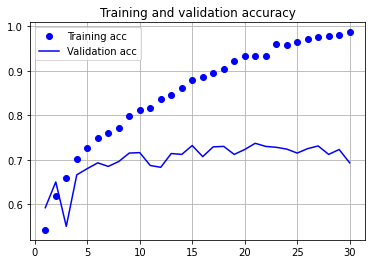

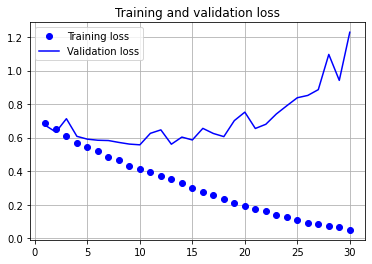

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc, 'bo', label = 'Training acc')
plt.plot(epochs,val_acc, 'b', label = 'Validation acc')
plt.title("Training and validation accuracy")
plt.legend()
plt.grid()
plt.show()

plt.figure()

plt.plot(epochs,loss, 'bo', label = 'Training loss')
plt.plot(epochs,val_loss, 'b', label = 'Validation loss')
plt.title("Training and validation loss")
plt.legend()
plt.grid()
plt.show()
